In [1]:
import matplotlib.pyplot as plt
import numpy as np
import wave
import sys
import scipy

In [2]:
wave_file = 'j_ily.wav'

In [3]:
wvf = wave.open(wave_file)

In [4]:
from wave import Wave_read

In [5]:
wvf.rewind()
signal = wvf.readframes(-1)
signal = np.frombuffer(signal, np.int16)

In [6]:
channels=np.reshape(signal, (int(len(signal)/2),2), order="A")

In [12]:
len(signal)

137292

In [16]:
channels.shape[2]

IndexError: tuple index out of range

In [7]:
fs = wvf.getframerate()

In [17]:
Time=np.linspace(0, len(signal)/2/fs, num=int(len(signal)/2))

In [18]:
len(Time)

68646

In [21]:
Time[-1]

1.5565986394557823

In [22]:
len(channels)

68646

In [38]:
channel = channels[:,1]

In [39]:
max_x = 100
max_y = 50

In [40]:
scale_x = max_x/Time[-1]
scale_y = max_y/np.max(np.abs(channel))

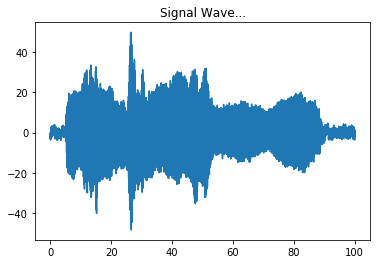

In [42]:
#Plot
plt.figure(1)
plt.title('Signal Wave...')
plt.plot(Time*scale_x,channel*scale_y)
plt.show()

In [43]:
x = channels[:,1]

In [45]:
plot_lines_x = np.linspace(0, 100, 10)

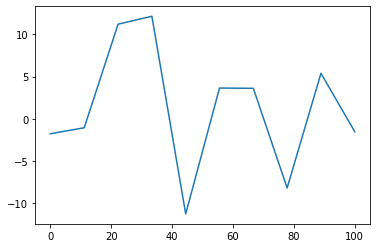

In [46]:
plot_lines_x = np.linspace(0, 100, 10)
plot_lines_y = np.interp(plot_lines_x, Time*scale_x,channels[:,1]*scale_y)
plt.plot(plot_lines_x, plot_lines_y)

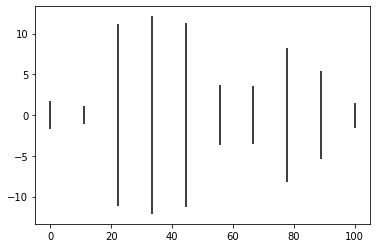

In [47]:
for idx, line in enumerate(np.abs(plot_lines_y)):
    plt.vlines(plot_lines_x[idx], -line, line)

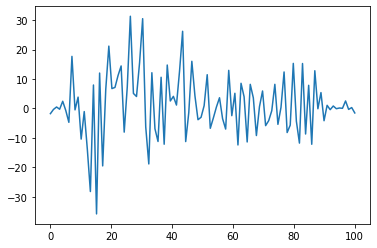

In [49]:
plot_lines_x = np.linspace(0, 100, 100)
plot_lines_y = np.interp(plot_lines_x, Time*scale_x,channel*scale_y)
plt.plot(plot_lines_x, plot_lines_y)

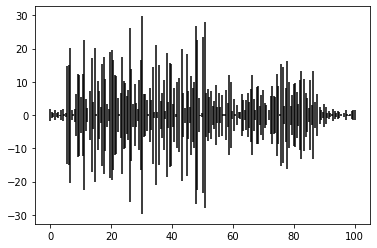

In [52]:
plot_lines_x = np.linspace(0, 100, 200)
plot_lines_y = np.interp(plot_lines_x, Time*scale_x,channel*scale_y)
for idx, line in enumerate(np.abs(plot_lines_y)):
    plt.vlines(plot_lines_x[idx], -line, line)

In [ ]:
import gcode

In [ ]:
prog = gcode.GCode()
for n in range(10):
    prog.G0(X=n)

In [ ]:
prog

In [ ]:
prog = gcode.GCode()
for idx, Y in enumerate(np.abs(plot_lines_y)):
    X=plot_lines_x[idx]
    prog.G0(X=X, Y=-Y)
    prog.M4(S=150)
    prog.G1(X=X, Y=-Y)
    prog.G1(X=X, Y=Y)
    prog.M5()